
# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)  Naive Bayes classifier
Week 8 | 2.1

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Describe Naive Bayes
- Choose a Naive Bayes implementation based on your use case
- Implement a Naive Bayes model through scikit-learn

### STUDENT PRE-WORK
*Before this lesson, you should already be able to:*
- Work with methods in scikit-learn
- Conceptually explain the Bayesian posterior distribution

### LESSON GUIDE
| Timing | Type | Topic |
| --- | --- | --- |
| 5 min | [Opening](#opening) | Bayes' theorem and Naive Bayes |
| 25 min | [Introduction](#introduction) | The basics of Naive Bayes |
| 25 min | [Guided Practice](#Guided)  | Using the Naive Bayes Implementation in Scikit-learn |
| 25 min | [Independent Practice](#Indy) | Apply your Naive Bayes on the data |
| 5 min |  [Conclusion](#conclusion)| Concluding Remarks |

---


### Bayes' thereom, again:


### $$P\left(\;A\;|\;B\;\right) = \frac{P\left(\;B\;|\;A\;\right)P\left(\;A\;\right)}{P(\;B\;)}$$


### $$P\left(\;model\;|\;data\;\right) = \frac{P\left(\;data\;|\;model\;\right)P\left(\;model\;\right)}{P(\;data\;)} $$


### Applying Bayes in supervised machine learning

> Check: How would you apply this in a machine learning context?



We can use this for classification problems.\* Its canonical use case is spam classification (or text classification generally).




<sub><sup>\*Or regression. But it doesn't work well.</sub></sup>

### What would our formula look like?

Let's say we're trying to predict 419 spam emails. M = 'million', S = 'is spam'.

#### $$P\left(\;S\;|\;M\;\right) = \frac{P\left(\;M\;|\;S\;\right)P\left(\;S\;\right)}{P(\;M\;)} = \frac{P\left(\;M\;|\;S\;\right)P\left(\;S\;\right)}{P(\;M\;|\;S)P(\;S\;) + P(\;M\;|\;\neg{S})P(\;\neg{S}\;)}$$



We can make some simplifying assumptions. Let's start by assuming an equal chance of spam / not spam. So:

### $$ P\left(\;S\;|\;M\;\right) =
\frac{P\left(\;M\;|\;S\;\right)}
{P(\;M\;|\;S) + P(\;M\;|\;\neg{S})}$$


But we'll use more than one feature. Really, we want to see some feature vector $X_1, X_2, ..., X_n$:

### $$P\left(\;S\;|\;X_1, X_2, ..., X_n\;\right) = \frac{P\left(\;X_1, X_2, ..., X_n\;|\;S\;\right)}{P(\;X_1, X_2, ..., X_n\;|\;S) + P(\;X_1, X_2, ..., X_n\;|\;\neg{S})}$$

Since these features can take on different values in each observation, our calculation is really:

### $$P\left(\;S\;|\;X_{1=x1}, X_{2=x2}, ..., X_{n=xn}\;\right) = \frac{P\left(\;X_{1=x1}, X_{2=x2}, ..., X_{n=xn}\;|\;S\;\right)}{P(\;X_{1=x1}, X_{2=x2}, ..., X_{n=xn}\;|\;S) + P(\;X_{1=x1}, X_{2=x2}, ..., X_{n=xn}\;|\;\neg{S})}$$


With a lot of features, calculating their joint probabilities could get hairy.

### Simplify again, naively

Joint probabilities are NBD if we *assume independence*: 
$P\left(\;X_{1=x1}, X_{2=x2}, ..., X_{n=xn}\;|\;S\;\right) = P\left(\;X_{1=x1} |\;S\;\right) * P\left(\;X_{2=x2} |\;S\;\right) ... P\left(\;X_{n=xn} |\;S\;\right)$

$$P\left(\;S\;|\;X_{1=x1}, X_{2=x2}, ..., X_{n=xn}\;\right) = \prod_{i=1}^{n}P(X_i = x_i | \;S\;) / C$$

Where C is some constant for our marginal probability of those data.

### This gives a handy decision function (generalizable to k classes)

![](./assets/images/nb_decision_rule.png)

### Using our Naive Bayes model

How do we code this and instantiate models?



How would you?

> Check: With a partner, jot down (pseudo)code for a Naive Bayes classifier. What are the inputs and outputs? How did you calculate probabilities? What implementation wrinkles do you notice?

### Moving toward a production implementation

Possible issues to contend with:




- [Underflow](http://stackoverflow.com/questions/3704570/in-python-small-floats-tending-to-zero). Probabilites may very very small, too small for floating point arithmetic. We can solve by leveraging:

$$log(ab) = log\ a + log\ b$$

$$exp(log\ x) = x$$

So $P_1\ *\ P_2\ ...\ *\ P_2 = exp(log\ P_1 + ... + log\ P_n)$


- '0' probabilities. What if you never saw a feature value in your training data? We can use Laplace smoothing:

$$\hat\theta_i= \frac{x_i + \alpha}{N + \alpha d}  \qquad (i=1,\ldots,d)$$

Where $\alpha > 0$ is the smoothing parameter.

- Real-valued features. This brings us to *distributions*.

### The likelihood functions

$P\left(\;X_{1=x1}, X_{2=x2}, ..., X_{n=xn}\;|\;S\;\right)$

Bayesians tend to talk in terms of distributions of belief. Rather than point estimates of probabilities, we can use distributions.

For a binary event, probability can be modeled with the **binomial distribution**.

For > 2 discrete outcomes, the **multinomial distribution**.

And if features are real-valued? **Gaussian**.
 
 

## Guided practice: Scikit-learn to the rescue

<a name = "demo"></a>
### Using the Naive Bayes Implementation in Scikit-learn (15 mins)


```python
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Import data into a numpy array
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

#Initialize a variable as the Guassian Naive Bayes classifier and fit it with the data
clf = GaussianNB()
clf.fit(X, Y)
GaussianNB()

# Predict a few instances
print(clf.predict([[-0.8, -1]]))
clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))
GaussianNB()
print(clf_pf.predict([[-0.8, -1]]))

```


In [1]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Import data into a numpy array
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

#Initialize a variable as the Guassian Naive Bayes classifier and fit it with the data
clf = GaussianNB()
clf.fit(X, Y)

# Predict a few instances
print clf.predict([[-0.8, -1]])
clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))
print clf_pf.predict([[-0.8, -1]])

[1]
[1]


<a name = "Guided"></a>
## Independent practice: Naive-Bayes classifier with real data (25 mins)

We're going to now try our hand at classifying some SPAM.

```python
# Work here
from sklearn import naive_bayes
import numpy as np
import pandas as pd

data = pd.read_csv('./assets/datasets/spam_base.csv')
```

<a name = "Indy"></a>
## Apply your Naive Bayes on the data  (25 min)

Now we should take the results above and try our hand with Naive Bayes. Which Naive Bayes classifier should we utilize? There are 3 variants (Normal, Bernoulli, Multinomial). Could we do some conversion of the data and try one or the other? How should we think about diagnosing the model performance?

Again, we must defer to the docs:

- [Docs 1](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
- [Docs 2](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
- [Docs 3](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)

The differences can be summarized as follows
-    ***BernoulliNB*** is designed for binary/boolean features
-    The ***multinomial Naive Bayes classifier*** is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as `tf-idf` may also work
-    ***GaussianNB*** is designed for continuous features (that can be scaled between 0,1) and is assumed to be normally distributed

In [2]:
from sklearn import naive_bayes
import numpy as np
import pandas as pd

In [13]:
data = pd.read_csv("./assets/datasets/spam_base.csv", header=None)
data.columns = ["X"+str(i) for i in data.columns[:-1]] + ["Y"]
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,Y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [15]:
# We need to separate the features from the target.
X = data[[i for i in data.columns if "X" in i]]
y = data["Y"]

In [20]:
all_features = list(X.columns)

In [25]:
# Define several different feature sets. Do we get more or better accuracy? Is more always better?
X10 = X[np.random.choice(all_features, size=10, replace=False)]
X20 = X[np.random.choice(all_features, size=20, replace=False)]
X30 = X[np.random.choice(all_features, size=30, replace=False)]
X40 = X[np.random.choice(all_features, size=40, replace=False)]
X50 = X[np.random.choice(all_features, size=50, replace=False)]

In [29]:
# Discuss... and think about what kind of diagnosis metrics we could utilize for the mod

In [36]:
clf10 = naive_bayes.GaussianNB()
clf10.fit(X10,y)
score10 = clf10.score(X10,y)
score10

0.5909584872853727

In [37]:
clf20 = naive_bayes.GaussianNB()
clf20.fit(X20,y)
score20 = clf20.score(X20,y)
score20

0.64073027602695065

In [39]:
clf30 = naive_bayes.GaussianNB()
clf30.fit(X30,y)
score30 = clf30.score(X30,y)
score30

0.68919800043468815

In [40]:
clf40 = naive_bayes.GaussianNB()
clf40.fit(X40,y)
score40 = clf40.score(X40,y)
score40

0.74005650945446644

In [41]:
clf50 = naive_bayes.GaussianNB()
clf50.fit(X50,y)
score50 = clf50.score(X50,y)
score50

0.81351880026081291

In [42]:
clfall = naive_bayes.GaussianNB()
clfall.fit(X,y)
scoreall = clfall.score(X,y)
scoreall

0.82286459465333628

In [58]:
clfall.predict(X)

array([1, 1, 1, ..., 0, 1, 1])

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

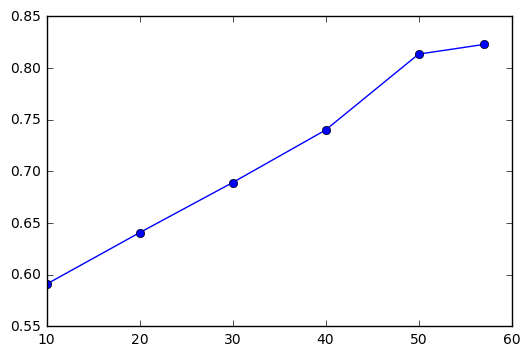

In [44]:
plt.plot([10,20,30,40,50,57],[score10, score20, score30, score40, score50, scoreall], '-', marker="o");

<a name = "conclusion"></a>
## Conclusion (5 min)


How does Naive Bayes fit into your toolkit? What are the pros and cons? How do you choose between variants?

#### Additional Resources

- [An interesting slide from a Stanford MOOC which had a section on Naive Bayes](https://web.stanford.edu/class/cs124/lec/naivebayes.pdf)
- [A much more technical paper comparing Naive Bayes to Logistics Regressions](https://www.cs.cmu.edu/~tom/mlbook/NBayesLogReg.pdf)
- [More exposition on Naive Bayes](http://blog.yhat.com/posts/naive-bayes-in-python.html)